<a href="https://colab.research.google.com/github/GladysJoseph/github_python_repo/blob/main/Trump_Tweets__sentiment_Analyzer__GA_NLP_LVC2_Text_Preproscessing_gladys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install unidecode
!pip install autocorrect

In [9]:
#importing the required libraries

# to read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# To visualize the graphs
import matplotlib.pyplot as plt
import seaborn as sns

#Helps to display the images
from PIL import Image

#Helps to extract the data using regular expressions
import re

#Helps to remove the punctuation
import string

# If helps to remove theaccented characters
import unidecode

#It help to correct the spellings
from autocorrect import Speller

#Importing the NLTK Library
import nltk


##**Load Dataset**

In [10]:
#Loading the data
messages = pd.read_csv('/content/drive/MyDrive/Gen AI Prompt _ Great Learning/trump_tweets_ dataset.csv')

In [11]:
data = messages.copy()

##**Overview of the dataset**

**View the first and the last 5 rows of the dataset**

In [12]:
data.head()

,Unnamed: 0,id,link,content,date,retweets,favorites,mentions,hashtags,geo,Sentiment
0,0,1.698309e+09,https://twitter.com/realDonaldTrump/status/1698308935,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,5/4/2009 20:54,500,868,NaN,NaN,NaN,positive
1,1,1.701461e+09,https://twitter.com/realDonaldTrump/status/1701461182,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,5/5/2009 3:00,33,273,NaN,NaN,NaN,positive
2,2,1.737480e+09,https://twitter.com/realDonaldTrump/status/1737479987,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,5/8/2009 15:38,12,18,NaN,NaN,NaN,positive
3,3,1.741161e+09,https://twitter.com/realDonaldTrump/status/1741160716,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,5/8/2009 22:40,11,24,NaN,NaN,NaN,positive
4,4,1.773561e+09,https://twitter.com/realDonaldTrump/status/1773561338,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",5/12/2009 16:07,1399,1965,NaN,NaN,NaN,positive


In [13]:
data.tail()

,Unnamed: 0,id,link,content,date,retweets,favorites,mentions,hashtags,geo,Sentiment
41117,41117,1.218960e+18,https://twitter.com/realDonaldTrump/status/1218962544372670467,I have never seen the Republican Party as Strong and as Unified as it is right now. Thank you!,1/19/2020 19:24,32620,213817,NaN,NaN,NaN,positive
41118,41118,1.219000e+18,https://twitter.com/realDonaldTrump/status/1219004689716412416,"Now Mini Mike Bloomberg is critical of Jack Wilson, who saved perhaps hundreds of people in a Church because he was carrying a gun, and knew how to use it. Jack quickly killed the shooter, who was beginning a rampage. Mini is against the 2nd A. His ads are Fake, just like him!",1/19/2020 22:12,36239,149571,NaN,NaN,NaN,negative
41119,41119,1.219050e+18,https://twitter.com/realDonaldTrump/status/1219053709428248576,"I was thrilled to be back in the Great State of Texas tonight, where the people are known for being tough, strong, hardworking, loyal and fiercely patriotic — just like America’s incredible Farmers! # AFBF2020https://www.pscp.tv/w/cPTqejFvTlFsTFJub1dwUXd8MUx5eEJMV09yYllHTlRz-5NbV2gPeKOOkDEM8yurjH1YctdRkh2JVPtJ_Se1?t=5m20s …",1/20/2020 1:27,16588,66944,NaN,#,NaN,positive
41120,41120,1.219070e+18,https://twitter.com/realDonaldTrump/status/1219066007731310593,"“In the House, the President got less due process than the 9-11 terrorists got. This is a corrupt process?” Mark Levin @ marklevinshow “Very much so!” @ RepDougCollins @ FoxNews",1/20/2020 2:16,20599,81921,@ @ @,NaN,NaN,negative
41121,41121,1.219080e+18,https://twitter.com/realDonaldTrump/status/1219076533354037249,A great show! Check it out tonight at 9pm. @ FoxNewshttps://twitter.com/nextrevfnc/status/1218941188704632832 …,1/20/2020 2:57,7947,34902,@,NaN,NaN,positive


**Understand the shape of the dataset**

In [14]:
data.shape

(41122, 11)

Number of Rows: The DataFrame contains 41,122 rows of data, as indicated by the "non-null" counts in each column.

**Checking the data typess of the coulumns for the dataset**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  41122 non-null  int64  
 1   id          41122 non-null  float64
 2   link        41122 non-null  object 
 3   content     41122 non-null  object 
 4   date        41122 non-null  object 
 5   retweets    41122 non-null  int64  
 6   favorites   41122 non-null  int64  
 7   mentions    22467 non-null  object 
 8   hashtags    5810 non-null   object 
 9   geo         0 non-null      float64
 10  Sentiment   41122 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 3.5+ MB


Observations:
Number of Rows: The DataFrame contains 41,122 rows of data, as indicated by the "non-null" counts in each column.

Column Data Types: The DataFrame has columns with different data types:

Four columns have integer data type (int64).
One column has floating-point data type (float64). - Six columns have object data type, typically representing strings or mixed data.

Missing Values: The "mentions" column has 22,467 non-null values, which means it contains missing values (NaN) for some rows. Similarly, the "hashtags" column has 5,810 non-null values, indicating missing values in that column as well.

**Checking for duplicates**

In [16]:
#Checking for duplicates values
data.duplicated().sum()

0

#Using the Content and Sentiment columns for Processing and Model **Building**

In [17]:
data = data[['content', 'Sentiment']]

In [18]:
data.head(10)

,content,Sentiment
0,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,positive
1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,positive
2,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,positive
3,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,positive
4,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump",positive
5,"Miss USA Tara Conner will not be fired - ""I've always been a believer in second chances."" says Donald Trump",positive
6,"Listen to an interview with Donald Trump discussing his new book, Think Like A Champion: http://tinyurl.com/qs24vl",positive
7,"""Strive for wholeness and keep your sense of wonder intact."" --Donald J. Trump http://tinyurl.com/pqpfvm",positive
8,"Enter the ""Think Like A Champion"" signed book and keychain contest: http://www.trumpthinklikeachampion.com/contest/",positive
9,"""When the achiever achieves, it's not a plateau, it’s a beginning."" --Donald J. Trump http://tinyurl.com/pqpfvm",positive


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    41122 non-null  object
 1   Sentiment  41122 non-null  object
dtypes: object(2)
memory usage: 642.7+ KB


# **Exploratory Data Analysis**

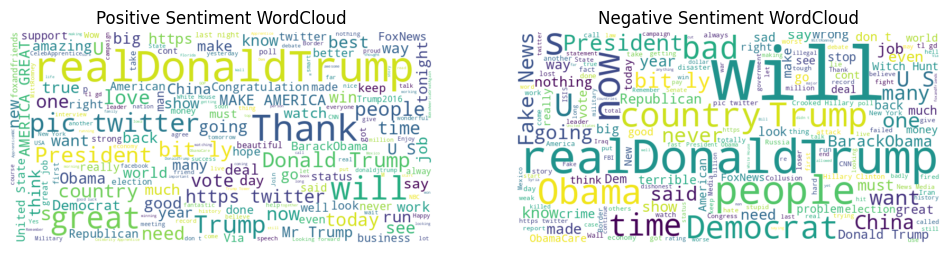

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the content for positive and negative sentiments
positive_content = data[data['Sentiment'] == 'positive']['content']
negative_content = data[data['Sentiment'] == 'negative']['content']

# Create a WordCloud for positive sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_content))

# Create a WordCloud for negative sentiments
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_content))

# Plot the WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment WordCloud')
plt.axis('off')

plt.show()

<ipython-input-21-e1730ad88a24>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sentiment', palette='Set2')


Text(0.5, 1.0, 'Distribution of Sentiments in Tweets')

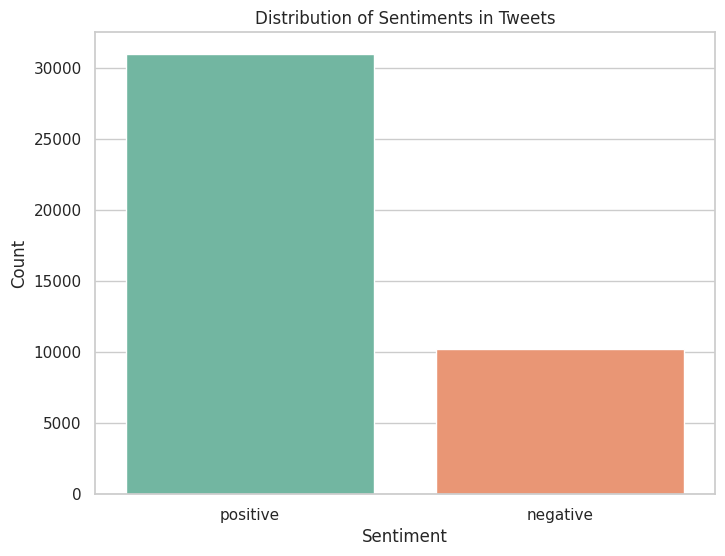

In [21]:
sns.set(style="whitegrid")

# Create a countplot for the 'Sentiment' column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sentiment', palette='Set2')

# Add labels and a title to the plot
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in Tweets')

In [22]:
data['Sentiment'].value_counts()

positive    30940
negative    10182
Name: Sentiment, dtype: int64

Positive Sentiment: There are 30,940 tweets classified as having a positive sentiment. This indicates that a significant portion of the dataset contains tweets expressing positive opinions or emotions.

Negative Sentiment: In contrast, there are 10,182 tweets classified as having a negative sentiment. While the number of negative sentiment tweets is notably smaller than the positive ones, it still represents a substantial portion of the dataset.

# **Text Preprocessing**

Text Preprocessing is an essential step in NLP and Text Analysis tasks.

The following code performs a few key preprocessing steps before proceeding with the code.

In [23]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
# Function for text preprocessing
def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Removing Punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # 3. Removing Special Characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 4. Tokenization
    tokens = word_tokenize(text)

    # 5. Stopword Removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # 6. Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # 7. Removing Numbers
    tokens = [token for token in tokens if not token.isdigit()]

    # 8. Removing Short Words (e.g., words with less than 3 characters)
    tokens = [token for token in tokens if len(token) > 2]

    # 9. Join Tokens Back to Text
    text = ' '.join(tokens)

    return text

# Apply preprocessing to the 'content' column
data['content'] = data['content'].apply(preprocess_text)

# Now 'data['content']' contains preprocessed text data


In [25]:
data['content']

0                                                                                                                                                       sure tune watch donald trump late night david letterman present top ten list tonight
1                                                                                                                                      donald trump appearing view tomorrow morning discus celebrity apprentice new book think like champion
2                                                                                                                                               donald trump read top ten financial tip late show david letterman httptinyurlcomooafwn funny
3                                                                                                                                                     new blog post celebrity apprentice finale lesson learned along way httptinyurlcomqluxe
4                                                   

In [26]:
# Define a mapping dictionary
sentiment_mapping = {'positive': 0, 'negative': 1}

# Apply the mapping to the 'Sentiment' column
data['Sentiment'] = data['Sentiment'].map(sentiment_mapping)


In [27]:
data.head()

,content,Sentiment
0,sure tune watch donald trump late night david letterman present top ten list tonight,0
1,donald trump appearing view tomorrow morning discus celebrity apprentice new book think like champion,0
2,donald trump read top ten financial tip late show david letterman httptinyurlcomooafwn funny,0
3,new blog post celebrity apprentice finale lesson learned along way httptinyurlcomqluxe,0
4,persona never wallflower rather build wall cling donald trump,0


## **Bag of Words Text Vectorization**
The Bag-of-Words model treats text as a collection of words, disregarding grammar and word order. It represents text by creating a vocabulary of unique words in the dataset and counting the frequency of each word's occurrence in a document. These word frequencies are then used as features for machine learning algorithms.

**Scikit-Learn provides a simple way to create a Bag-of-Words representation of text data using its CountVectorizer class**

**Key Parameters:**

stop_words: You can specify a list of stop words to be excluded from the vocabulary.

max_features: Limit the number of features (words) to consider based on the most frequent ones.

ngram_range: You can consider not only individual words but also word combinations (bigrams, trigrams, etc.) by setting this parameter.

In [28]:
# Importing the CountVectorizer class for bag-of-words representation
from sklearn.feature_extraction.text import CountVectorizer

# Importing train-test split function for dataset splitting
from sklearn.model_selection import train_test_split

# Importing the RandomForestClassifier for building the classification model
from sklearn.ensemble import RandomForestClassifier

# Importing performance metrics - confusion matrix, accuracy, and F1 score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['Sentiment'], test_size=0.2, random_state=42)

In [30]:
#Create a Bag of Words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [31]:
X_test = vectorizer.transform(X_test)

## **Random Forest Classifier for Machine Learning**

In [ ]:
# Create a Random Forest Classifier with 100 decision trees and a fixed random seed for reproducibility
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit (train) the classifier on the training data
rf_classifier.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data using the trained Random Forest Classifier
y_pred = rf_classifier.predict(X_test)

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

**Accuracy (0.86):**

Accuracy is a measure of how many of the total predictions made by your model were correct. An accuracy of 0.86 means that your model correctly classified 86% of the total examples in the dataset.

**F1 Score (0.67):**

The F1 Score is a metric that takes both precision and recall into account and provides a balance between them. It's particularly useful when dealing with imbalanced datasets. An F1 Score of 0.67 suggests a reasonable balance between precision and recall.

## **TF-IDF Text Vectorization**

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus). It is widely used in text mining and natural language processing for various tasks, such as information retrieval, text classification, and document clustering.

**Term Frequency (TF)**: This component measures how frequently a term (word) appears in a document. It is calculated as the ratio of the number of times a term occurs in a document to the total number of terms in that document. TF emphasizes words that appear often in a document.
TF = (Number of times term appears in document) / (Total number of terms in document)

**Inverse Document Frequency (IDF):** IDF measures the importance of a term across a collection of documents (corpus). It is calculated as the logarithm of the ratio of the total number of documents to the number of documents containing the term. IDF downweights terms that are common across many documents.
**IDF = log(Total number of documents / Number of documents containing the term)**

**Scikit-Learn provides a simple and effective way to compute TF-IDF scores for text data using the TfidfVectorizer clas**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['Sentiment'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## **Random Forest Classifier for Machine Learning**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_model.fit(X_train_tfidf, y_train)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## **Conclusion and Takeaways**
As we're seeing above, both the Bag of Words & TF-IDF Text Vectorization techniques, when paired with a Machine Learning model, are able to get around 67% F1 score on this imbalanced Text Classification problem on Sentiment Analysis.

This is quite expected, given the relative naïvety of these techniques. Being count-based / statistical techniques, they have little-to-no scope of understanding the semantic meaning of the text in the dataset, which as the industry eventually realized, was critical to performing well on many Natural Language Processing tasks.

Deep Learning and Neural Networks allowed us to create a better text vectorization scheme - Word Embeddings, which started to get a glimpse of the semantic meaning contained in text. This definitely enabled an improvement in performance, as we shall observe in the upcoming module.



---

